In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
train = pd.read_csv('train.csv')
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [38]:
train.drop(['timestamp'], axis= 1,inplace=True)

In [39]:
train.head()

,userId,movieId,rating
0,5163,57669,4.0
1,106343,5,4.5
2,146790,5459,5.0
3,106362,32296,2.0
4,9041,366,3.0


In [40]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [41]:
df = pd.merge(train,movies, on='movieId')

In [42]:
df.head()

,userId,movieId,rating,title,genres
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [43]:
df.drop(['genres'], axis =1, inplace=True)

In [44]:
df.head()

,userId,movieId,rating,title
0,5163,57669,4.0,In Bruges (2008)
1,87388,57669,3.5,In Bruges (2008)
2,137050,57669,4.0,In Bruges (2008)
3,120490,57669,4.5,In Bruges (2008)
4,50616,57669,4.5,In Bruges (2008)


In [45]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Final Recourse (2013)        5.0
Lady and the Tramp (2019)    5.0
Virasat (1997)               5.0
Committed (2014)             5.0
Sole Proprietor (2016)       5.0
Name: rating, dtype: float64

In [46]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Shawshank Redemption, The (1994)    32831
Forrest Gump (1994)                 32383
Pulp Fiction (1994)                 31697
Silence of the Lambs, The (1991)    29444
Matrix, The (1999)                  29014
Name: rating, dtype: int64

In [47]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000
"""Great Performances"" Cats (1998)",2.753731
#1 Cheerleader Camp (2010),1.900000
#Female Pleasure (2018),4.000000
#FollowMe (2019),2.400000


In [48]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.753731,67
#1 Cheerleader Camp (2010),1.900000,5
#Female Pleasure (2018),4.000000,1
#FollowMe (2019),2.400000,5


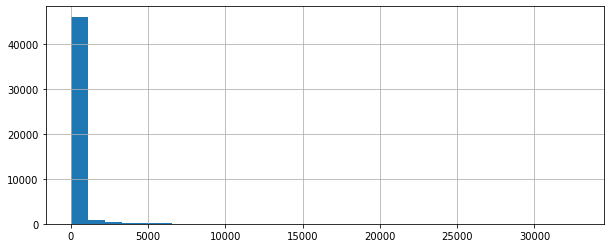

In [49]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=30)

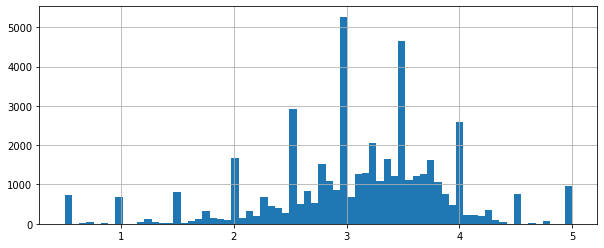

In [50]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

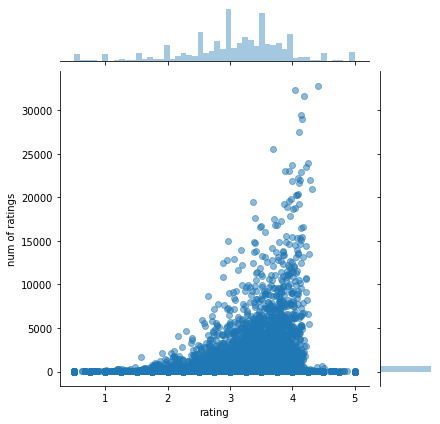

In [51]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [52]:
imdb = pd.read_csv('imdb_data.csv')
imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [53]:
ratings

,rating,num of ratings
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.753731,67
#1 Cheerleader Camp (2010),1.900000,5
#Female Pleasure (2018),4.000000,1
#FollowMe (2019),2.400000,5
...,...,...
به نام پدر,3.250000,2
…And the Fifth Horseman Is Fear (1965),3.000000,1
チェブラーシカ (2010),2.000000,3


In [59]:
links = pd.read_csv('links.csv')
links.tail()

,movieId,imdbId,tmdbId
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0
62422,209171,55323,79513.0


In [55]:
ratings = ratings.merge(movies,how='left', on='title')

In [56]:
ratings.drop(['genres'], axis =1, inplace=True)

In [58]:
ratings_full.head(20)

,title,rating,num of ratings,movieId,title_cast,director,runtime,budget,plot_keywords
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",3.000000,1,208297,NaN,NaN,NaN,NaN,NaN
1,"""Great Performances"" Cats (1998)",2.753731,67,51372,Elaine Paige|John Mills|Ken Page|Rosemarie For...,T.S. Eliot,120.0,NaN,ballet|aging|kidnapping|magician
2,#1 Cheerleader Camp (2010),1.900000,5,136604,NaN,NaN,NaN,NaN,NaN
3,#Female Pleasure (2018),4.000000,1,195955,NaN,NaN,NaN,NaN,NaN
4,#FollowMe (2019),2.400000,5,203417,NaN,NaN,NaN,NaN,NaN
5,#Horror (2015),2.250000,8,151789,NaN,NaN,NaN,NaN,NaN
6,#Lucky Number (2015),3.000000,1,179057,NaN,NaN,NaN,NaN,NaN
7,#Stuck (2014),0.500000,1,205461,NaN,NaN,NaN,NaN,NaN
8,#realityhigh (2017),2.642857,7,177545,NaN,NaN,NaN,NaN,NaN
9,$ (Dollars) (1971),2.875000,16,85177,NaN,NaN,NaN,NaN,NaN
